# Практическая работа №2
## Чурсинов Герман Сергеевич ББМО-01-23

Ноутбук .ipynb доступен в среде Google Colab по ссылке: https://colab.research.google.com/drive/1s9KC9BUPW7vCVo2FXGP90WVqvW1sFFYH?usp=sharing

### Выбор варианта
![](https://i.imgur.com/JYk3e4f.png)

In [1]:
variant = 26 % 16 + 1
print(f"Вариант №{variant}")

Вариант №11


11. OpenStack



### Подключение библиотек



In [2]:
# Библиотека для использования регулярных выражений
import re
# Библиотека для работы с классом времени
from datetime import datetime
# Библиотека для использования базы данных SQLite
import sqlite3
# Библиотека для удобной работы с табличными данными
import pandas as pd
# Библиотека для удобной визуализации данных
import matplotlib.pyplot as plt
import matplotlib.dates as plt_dts

### Установка и открытие лог-файла


In [3]:
# Скопируем репозиторий с github
!git clone https://github.com/logpai/loghub.git

Cloning into 'loghub'...
remote: Enumerating objects: 575, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 575 (delta 145), reused 135 (delta 132), pack-reused 404 (from 1)
Receiving objects: 100% (575/575), 7.27 MiB | 10.47 MiB/s, done.
Resolving deltas: 100% (267/267), done.


In [7]:
# Откроем файл и выведем его содержимое (Первые 10 строк)
with open('/content/loghub/OpenStack/OpenStack_2k.log', 'r') as file:
  openstack_logs = file.readlines()
for log in openstack_logs[:10]:
  print(log.replace('\n', ''))

nova-api.log.1.2017-05-16_13:53:08 2017-05-16 00:00:00.008 25746 INFO nova.osapi_compute.wsgi.server [req-38101a0b-2096-447d-96ea-a692162415ae 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" status: 200 len: 1893 time: 0.2477829
nova-api.log.1.2017-05-16_13:53:08 2017-05-16 00:00:00.272 25746 INFO nova.osapi_compute.wsgi.server [req-9bc36dd9-91c5-4314-898a-47625eb93b09 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" status: 200 len: 1893 time: 0.2577181
nova-api.log.1.2017-05-16_13:53:08 2017-05-16 00:00:01.551 25746 INFO nova.osapi_compute.wsgi.server [req-55db2d8d-cdb7-4b4b-993b-429be84c0c3e 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" status: 200 len: 1893 time: 0.2731631
nova

Отдельная запись выглядит следующим образом:

In [ ]:
# nova-api.log.1.2017-05-16_13:53:08 2017-05-16 00:00:00.008 25746 INFO nova.osapi_compute.wsgi.server [req-38101a0b-2096-447d-96ea-a692162415ae 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" status: 200 len: 1893 time: 0.2477829

Структура следующая:
* **Запись в лог** (в данном случае nova-api.log.1.2017-05-16_13:53:08)
* **Дата** (в данном случае 2017-05-16)
* **Время** (в данном случае 00:00:00.008)
* **PID** (в данном случае 25746)
* **Уровень логирования** (в данном случае INFO)
* **Компонент** (в данном случае nova.osapi_compute.wsgi.server)
* **Адрес** (в данном случае [req-38101a0b-2096-447d-96ea-a692162415ae 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -])
* **Содержимое** (в данном случае 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" status: 200 len: 1893 time: 0.2477829)

### Парсинг лог-файла

In [29]:
pattern = re.compile(r'(.*?)\s(\d\d\d\d-\d\d-\d\d)\s(\d\d:\d\d:\d\d\.\d\d\d)\s(\d{0,})\s(\w{0,})\s(.*?)\s\[(.*?)\]\s(.*)')

a = []
for log in openstack_logs:
  matches = re.match(pattern, log)
  if matches:
    a.append([matches.group(1), matches.group(2), matches.group(3), matches.group(4), matches.group(5), matches.group(6), matches.group(7), matches.group(8).replace('"', "'")])

### Сохранение каждой записи в СУБД

In [32]:
# Создание СУБД
connection = sqlite3.connect('logs.db')
cursor = connection.cursor()
cursor.execute("DROP TABLE IF EXISTS logs")
cursor.execute("CREATE TABLE logs (id INTEGER PRIMARY KEY AUTOINCREMENT, logrecord VARCHAR(255), date DATE, time TIME, pid INT, level VARCHAR(50), component VARCHAR(255), addr VARCHAR(255), content TEXT)")

# Внесение данных в СУБД
for _ in a:
  query = f'INSERT INTO logs (logrecord, date, time, pid, level, component, addr, content) VALUES ("{_[0]}", "{_[1]}", "{_[2]}", {_[3]}, "{_[4]}", "{_[5]}", "{_[6]}", "{_[7]}")'
  try:
    cursor.execute(query)
  except:
    print(query)

# Закрытие СУБД
connection.commit()
cursor.close()
connection.close()

# Открытие СУБД
connection = sqlite3.connect('logs.db')
cursor = connection.cursor()
cursor.execute("SELECT * FROM logs")
data = cursor.fetchall()
cursor.close()
connection.close()
pd_data = pd.DataFrame(data, columns=("ID", "Запись", "Дата", "Время", "PID", "Уровень логирования", "Компонент", "Адрес", "Содержание"))
pd_data

,ID,Запись,Дата,Время,PID,Уровень логирования,Компонент,Адрес,Содержание
0,1,nova-api.log.1.2017-05-16_13:53:08,2017-05-16,00:00:00.008,25746,INFO,nova.osapi_compute.wsgi.server,req-38101a0b-2096-447d-96ea-a692162415ae 113d3...,10.11.10.1 'GET /v2/54fadb412c4e40cdbaed9335e4...
1,2,nova-api.log.1.2017-05-16_13:53:08,2017-05-16,00:00:00.272,25746,INFO,nova.osapi_compute.wsgi.server,req-9bc36dd9-91c5-4314-898a-47625eb93b09 113d3...,10.11.10.1 'GET /v2/54fadb412c4e40cdbaed9335e4...
2,3,nova-api.log.1.2017-05-16_13:53:08,2017-05-16,00:00:01.551,25746,INFO,nova.osapi_compute.wsgi.server,req-55db2d8d-cdb7-4b4b-993b-429be84c0c3e 113d3...,10.11.10.1 'GET /v2/54fadb412c4e40cdbaed9335e4...
3,4,nova-api.log.1.2017-05-16_13:53:08,2017-05-16,00:00:01.813,25746,INFO,nova.osapi_compute.wsgi.server,req-2a3dc421-6604-42a7-9390-a18dc824d5d6 113d3...,10.11.10.1 'GET /v2/54fadb412c4e40cdbaed9335e4...
4,5,nova-api.log.1.2017-05-16_13:53:08,2017-05-16,00:00:03.091,25746,INFO,nova.osapi_compute.wsgi.server,req-939eb332-c1c1-4e67-99b8-8695f8f1980a 113d3...,10.11.10.1 'GET /v2/54fadb412c4e40cdbaed9335e4...
...,...,...,...,...,...,...,...,...,...
1995,1996,nova-api.log.1.2017-05-16_13:53:08,2017-05-16,00:14:47.410,25746,INFO,nova.osapi_compute.wsgi.server,req-699eeadf-6db8-44a4-8521-1ab4e8a53b53 113d3...,10.11.10.1 'DELETE /v2/54fadb412c4e40cdbaed933...
1996,1997,nova-compute.log.1.2017-05-16_13:55:31,2017-05-16,00:14:47.447,2931,INFO,nova.compute.manager,req-699eeadf-6db8-44a4-8521-1ab4e8a53b53 113d3...,[instance: faf974ea-cba5-4e1b-93f4-3a3bc606006...
1997,1998,nova-api.log.1.2017-05-16_13:53:08,2017-05-16,00:14:47.652,25799,INFO,nova.metadata.wsgi.server,req-e5e061d6-f2aa-464b-9512-2fd6c7c9a812 - - -...,"10.11.21.143,10.11.10.1 'GET /latest/meta-data..."
1998,1999,nova-compute.log.1.2017-05-16_13:55:31,2017-05-16,00:14:47.663,2931,INFO,nova.virt.libvirt.driver,-,[instance: faf974ea-cba5-4e1b-93f4-3a3bc606006...


### Визуализация результатов

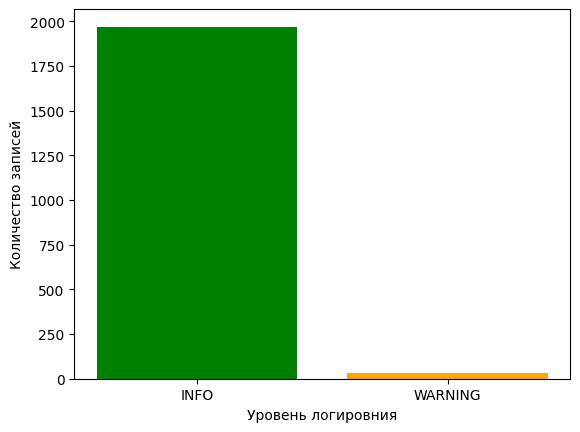

In [35]:
# Подсчёт записей с различными уровнями логирования
pd_data_distrib = pd_data['Уровень логирования'].value_counts()

x = pd_data_distrib.keys()
y = pd_data_distrib.values

# Заголовки для графика
verbose_xticks = ["INFO", "WARNING"]

plt.xticks([0,1], verbose_xticks)
plt.xlabel('Уровень логировния')
plt.ylabel('Количество записей')
plt.bar(x,y)
plt.bar(x,y, color = ['green', 'orange'])

plt.show()

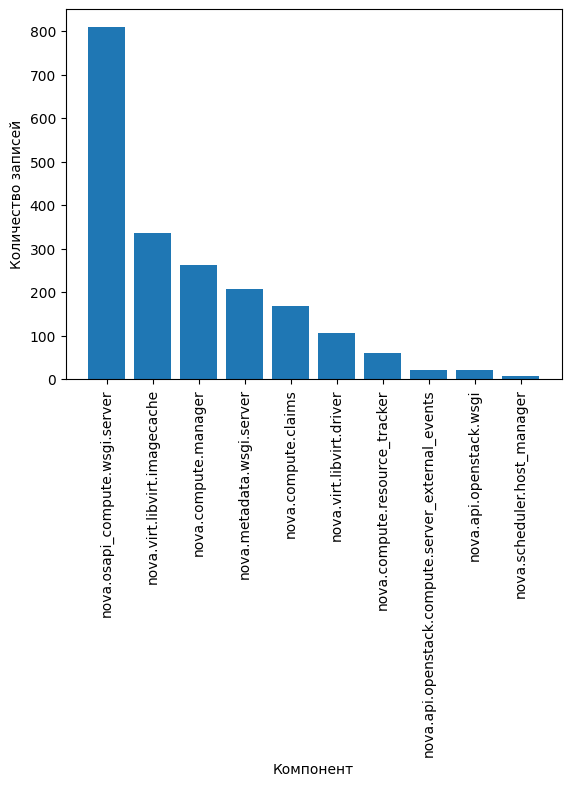

In [47]:
# Подсчёт логирующих компонентов
pd_data_distrib = pd_data['Компонент'].value_counts()

x = pd_data_distrib.keys()
y = pd_data_distrib.values

# Заголовки для графика
plt.xticks(rotation=90)
plt.xlabel('Компонент')
plt.ylabel('Количество записей')
plt.bar(x,y)
plt.show()


<ipython-input-56-a35fff40388c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  copy_df['Компонент'] = pd.to_datetime(copy_df['Время'])


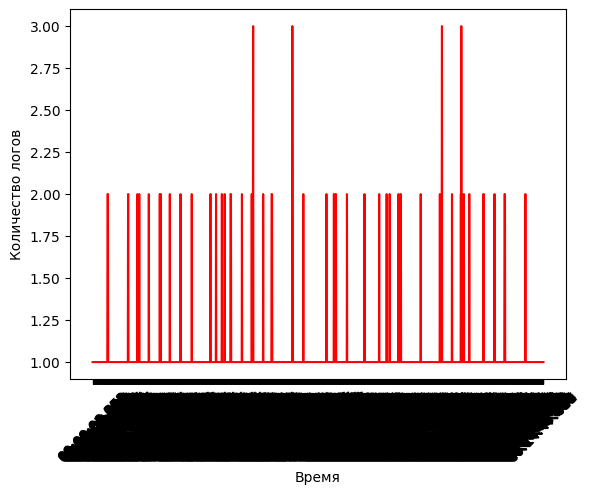

In [56]:
# Когда логировались записи
copy_df = pd_data.copy()
copy_df['Компонент'] = pd.to_datetime(copy_df['Время'])
copy_count = copy_df.groupby('Время').size()

plt.plot(copy_count.index, copy_count.values, linestyle='-', color='r')
plt.xlabel('Время')
plt.xticks(rotation=45)
plt.ylabel('Количество логов')
plt.show()